In [165]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
def extract_images():

    # files
    csv_path='../data/dhs_clusters.csv'
    df = pd.read_csv(csv_path, float_precision='high', index_col=False)
    REQUIRED_BANDS = [
        'BLUE', 'GREEN', 'LAT', 'LON', 'NIGHTLIGHTS', 'NIR', 'RED',
        'SWIR1', 'SWIR2', 'TEMP1']
    country_year = list(df.groupby(['country', 'year']).groups.keys())[:-2]
    
    lst = []

    for country, year in country_year[0:1]:
        str = f"{country}_{int(year)}"
        files = os.listdir(f"../data/dhs_tfrecords/{str}/")
        files = sorted(files)
        print(f"======= {str} =======")

    options = tf.io.TFRecordOptions(tf.io.TFRecordCompressionType.GZIP)
    i = 1

    for file in files:
        print(file)
        path = f"../data/dhs_tfrecords/{str}/{file}"
        iterator = tf.io.tf_record_iterator(path, options=options)
        for record_str in iterator:
            ex = tf.train.Example.FromString(record_str)
            feature_map = ex.features.feature

            bands_feature = {}
            bands_values = {}

            for band in REQUIRED_BANDS:
                if band == 'LAT':
                    lat = feature_map['lat'].__getattribute__('float_list').value[0]
                if band == 'LON':
                    lon = feature_map['lon'].__getattribute__('float_list').value[0]
                bands_feature[band] = feature_map[band]
                bands_values[band] = np.reshape(
                    np.array(
                        bands_feature[band].__getattribute__('float_list').value
                        ), (255, 255)
                )
        
            image_stacked = np.dstack((
                bands_values['RED'],
                bands_values['GREEN'],
                bands_values['BLUE'],
                bands_values['NIR'],
                bands_values['SWIR1'],
                bands_values['SWIR2'],
                bands_values['TEMP1'],
                ))
            
            latlon = np.array([round(lat, 6), round(lon, 6)]).astype('float64')

            df_subset = df[(df.lat <= latlon[0]+.000005) & (df.lat >= latlon[0]-.000005) & (df.lon <= latlon[1]+.000005) & (df.lon >= latlon[1]-.000005)]
            print(df_subset)
            print(latlon)
            print(len(lst))
            index = df_subset.index[0]
            assert index == (len(lst))
            lst.append(image_stacked)
            print(f"appended image {i} of {str}")
            i += 1

    print("Converting list to np.array")
    X = np.array(lst)

    return X



In [ ]:
# options = tf.io.TFRecordOptions(tf.io.TFRecordCompressionType.GZIP)
# _ = "../data/dhs_tfrecords/00000.tfrecord.gz"
# iter_ = tf.io.tf_record_iterator(_, options=options)
# for record_str in iter_:
#     ex_ = tf.train.Example.FromString(record_str)
#     feature_map_ = ex.features.feature

In [218]:
X = np.array(lst)

In [219]:
X.shape

(230, 255, 255, 7)

In [220]:
np.save('../preprocessing/angola_2011_array.npy', X)

In [207]:
latlon_ = [-12.186224, 16.745167]
df[(df.lat == latlon_[0])]

,country,year,lat,lon,wealthpooled,households,urban_rural
35,angola,2011,-12.186224,16.745166,-0.829583,35,0


In [203]:
np.array(lst).shape

(35, 255, 255, 7)

In [185]:
lst = []
len(lst)

0

In [117]:
bands_values

{'BLUE': array([[0.06225   , 0.06015   , 0.05865   , ..., 0.169     , 0.1609    ,
         0.148     ],
        [0.06395   , 0.06425   , 0.06065   , ..., 0.1538    , 0.14895   ,
         0.15225001],
        [0.0567    , 0.058     , 0.0583    , ..., 0.1425    , 0.1479    ,
         0.15880001],
        ...,
        [0.04205   , 0.0441    , 0.0423    , ..., 0.0505    , 0.05095   ,
         0.0516    ],
        [0.04175   , 0.04145   , 0.038     , ..., 0.0505    , 0.05095   ,
         0.0516    ],
        [0.0401    , 0.0427    , 0.0433    , ..., 0.049     , 0.0488    ,
         0.0515    ]]),
 'GREEN': array([[0.09035   , 0.0865    , 0.08625   , ..., 0.25529999, 0.2339    ,
         0.2066    ],
        [0.09595   , 0.0904    , 0.09115   , ..., 0.2339    , 0.21600001,
         0.21735001],
        [0.0868    , 0.086     , 0.0888    , ..., 0.1997    , 0.2087    ,
         0.22840001],
        ...,
        [0.0379    , 0.042     , 0.0406    , ..., 0.04905   , 0.04945   ,
         0.05005 

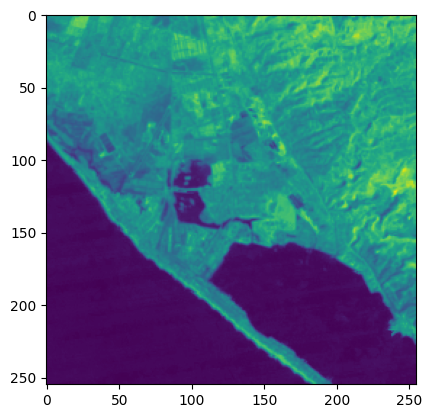

In [170]:
plt.imshow(bands_values['NIR'])

In [66]:
image_stacked = np.dstack((
    bands_values['RED'],
    bands_values['GREEN'],
    bands_values['BLUE'],
    bands_values['NIR'],
    bands_values['SWIR1'],
    bands_values['SWIR2'],
    bands_values['TEMP1'],
    ))

In [161]:
image_stacked_t = tf.convert_to_tensor(image_stacked)

In [162]:
image_stacked_t.shape

TensorShape([Dimension(255), Dimension(255), Dimension(7)])

In [160]:
type(image_stacked)

numpy.ndarray

In [151]:
latlon[1] == df.iloc[1, 3]

True

In [156]:
index = df[(df.lat == latlon[0]) & (df.lon == latlon[1])].index[0]

In [163]:
df.loc['image', index] = image_stacked_t

NotImplementedError: Cannot convert a symbolic Tensor (Const:0) to a numpy array.